## Generating Random numbers:

# 1. A. Key libraries/packages:

In [73]:
import numpy as np
import itertools #combinations, for programmatic variable comparisons
import seaborn as sns
import scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

# 1. B. Importing with SQL:

In [73]:
## make sure env and .gitignore are in your current directory (CMD + SHIFT + period)
import env
from env import get_db_url
url = get_db_url('employees')
df = pd.read_sql("Query", url)

### Generate Random Numbers and Shape into an Array:

In [4]:
# simulate the outcome of rolling 3 dice, 10k times
ncols = ndice = 3
nrows = nrolls = 10000

rolls = np.random.choice([1, 2, 3, 4, 5, 6],
                        ndice * nrolls).reshape(nrows, ncols)

rolls

#then we can manipulate the data...
wins = rolls.sum(axis=1) > 7
wins.mean()

0.8359

### Scipy Objects
- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable   
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point 
   -- isf: greater than a point  
- rvs for random values 

# 2. Measuring Probability Distributions:

In [20]:
#random discrete variable:
die_distribution = stats.randint(1,7)
die_distribution.rvs((5,6)) #rows, then columns

array([[6, 3, 2, 5, 5, 5],
       [2, 5, 1, 2, 2, 4],
       [3, 1, 6, 6, 1, 1],
       [4, 3, 4, 1, 4, 4],
       [2, 6, 4, 5, 6, 2]])

### Distribution: Descriptive methods

In [21]:
#what's the probability we will roll a 3? (PMF for discrete/PDF for continuous)
die_distribution.pmf(3) #likelihood of instantaneous probability

0.16666666666666666

In [22]:
#what's the proabability we will roll a 3 or higher? (SF)
die_distribution.sf(2) #sf is exclusive, prob above given number

0.6666666666666667

In [23]:
#what's the value we will roll higher than, 0.666667 of time? (ISF)
die_distribution.isf(0.666667)

2.0

In [24]:
#what's the probability we will roll a 3 or lower? (CDF)
die_distribution.cdf(3) #cumulative probability at 3 or lower

0.5

In [25]:
#given probability of 0.5, what is the number we will roll or lower? (PPF)
die_distribution.ppf(0.5)

3.0

### A. Uniform Distribution

### "All outcomes are equally likely"

#### The distribution where we have:
- an equal likelihood of all outcomes (fair 6 sided dice), discrete variables
- need: number of outcomes (6), probability (1/n)

(array([    0., 16760., 16528., 16982., 16632., 16502., 16596.,     0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <BarContainer object of 8 artists>)

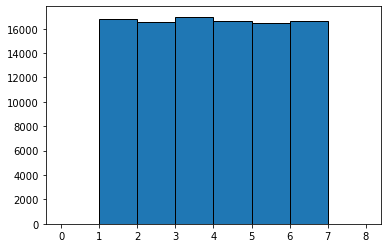

In [46]:
n = 100000
x = die_distribution.rvs(n)

plt.hist(x, bins=range(0,9), edgecolor='black')

### B. Binomial Distribution
### "How likely is a correct answer on a 20 question test with 4 choices per question?"

### The distribution when we have:
- a binary outcome (success/failure) >> a discrete variable
- a finite number of trials/questions on a test
- need: number of trials, p(success)

In [45]:
## Key formula:
stats.binom(n_trials, p_success)

In [38]:
# formula:
n_trials = 30
p_success = 0.25
success_rate = stats.binom(n_trials, p_success)
# probability of success in >10 trials?
success_rate.sf(10)

0.10572812269266013

Text(0.5, 1.0, 'Trials v. Mean Success Rates')

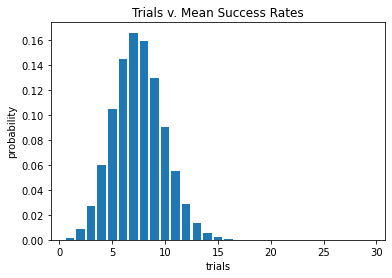

In [44]:
x=np.arange(1,30)
y=success_rate.pmf(x)

plt.bar(x, y)
plt.figaspect(8*10)
plt.ylabel("probability")
plt.xlabel("trials")
plt.title("Trials v. Mean Success Rates")

### C. Normal Distribution
### "What is the average height of students in San Antonio?"

### The distribution when we have:
- Gaussian distribution
- a continuous variable: height, commute time, salary
- need: mean, standard deviation

In [ ]:
## Key Formula:
stats.norm(mean, std_dev)

In [76]:
gpa_mean = 6
std = 0.355

su_grades = stats.norm(gpa_mean, std)
su_grades.pdf(0.05) #continuous variables use .pdf instead of .pmf

1.1231612080708294e-61

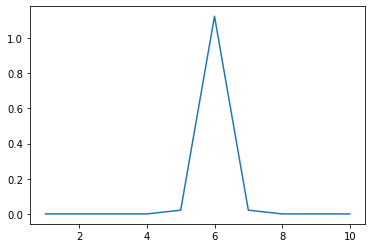

In [80]:
x=np.arange(1,11)
y=su_grades.pdf(x)

plt.plot(x, y)

### D. Poisson Distribution
### " What is the likelihood that a meteor strikes earth in a 100 year period given the earth is struck once every 452 years?"

### The distribution when we have:
- a lambda value: an anticipated/theoretical occurence value for an event: number of junk emails in a day
- a continuous variable (emails, phone calls, vehicles in traffic at location)
- an actual occurence value
- a specified timeframe

In [ ]:
## Key formula:
# lambda = rate_of_occurrence
stats.poisson(theoretical_rate_occurence)

<BarContainer object of 10 artists>

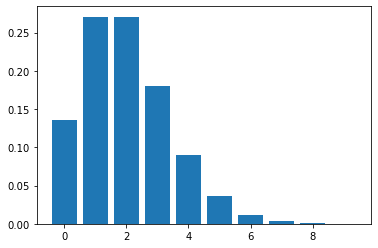

In [72]:
# mean of cars is two. that will be our lambda for the Poisson Dist
cars = 2

x = np.arange(0, 10)
y = stats.poisson(cars).pmf(x)
plt.bar(x, y)

# Testing for a Relationship between variables:

## 1. T-testing
- goal: **comparing the means of two groups** (two sample test, or a group's mean to a theoretical mean (1 sample test))
- variables compared: mean of group A, vs mean of group B. groups are categorical ("Churned", "No Churn"), mean is of a continuous variable ("Monthly Charges")

## TWO TAILED: is one mean different than the other?
## ONE TAILED: is one mean larger than another? (now directionality of t matters)

## A. One Sample T-test:
- **key formula: tstat, p_val = scipy.stats.ttest_1samp**
- use when: comparing a group mean, to a theoretical mean. 
    - EG churned customers monthly charges against avg monthly charges
- process:
    1. plot distribution (histogram): df.hist()
    2. establish hypotheses: 
        -null: no difference in means between variables
        -alt: there is a difference (positive or negative) between the means, or sample and population means
            - this is a two tailed test
    3. alpha = 0.05 (unless otherwise stated)
    4. Verify Assumptions: 
        - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
    5. Compute test statistic and probability (t-statistic & p-value) using **scipy.stats.ttest_1samp.**
    6. Reject or fail to reject the null hypothesis (declare it). p < a and t > 0 are required to rejct H0

## A. Two Sample (independent) T-test:
- **key formula: tstat, p_val = scipy.stats.ttest_ind**
- use when: comparing a group mean, to a theoretical mean. 
    - EG churned customers avg monthly charges against non-churn customers avg monthly charges
- process:
    1. plot distribution (histogram): df.hist()
    2. establish hypotheses: 
        -null: no difference in means between variables
        -alt: there is a difference (positive or negative) between the means, or sample and population means
            - this is a two tailed test
    3. alpha = 0.05 (unless otherwise stated)
    4. Verify Assumptions: 
        - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
        - Independent samples
        - Equal Variances (or set method argument to False when not)
            - (Levenes test: stat, p_val = stats.levene(automatic_cars_mpg, manual_cars_mpg)
    5. Compute test statistic and probability (t-statistic & p-value) using **scipy.stats.ttest_ind.**
    6. Reject or fail to reject the null hypothesis (declare it). p < a and t > 0 are required to rejct H0

## 2.  Correlation testing (Pearson's R, and Spearman)
 - goal: establish correlation between **2 continuous variables**, testing for a **LINEAR relationship only**
     - EG tenure and monthly charges
 - key formula: 
     - r, p_val = stats.pearsonr(x, y). x = df.x, y = df.y
 - Note: for non-linear reationships use Spearman test
 - Process
    1. Setup hypotheses (null and alternate)
    2. Calculate test statistic + p-value
    3. Conclude

## 2.  Compare group membership: Chi Squared
 - Goal: determine if one group is independent of another
 - observed is the crosstab of the two categorical relationships you are interested in.
 - input is two series

    - Process:
    1. state null: there is no relationship between categorical variables a and b/ a and b are independent of one another
    2. run 'observed = pd.ctosstab(df.A, df.B)
    3. Compare p to a, if p < a, reject the null hypothesis
 - Key formulas:
     - observed = pd.crosstab(df.smoker, df.time) 
         - observed
     - chi2, p, degf, expected = stats.chi2_contingency(observed)
         - p

In [81]:
burger_wait_time_dist = stats.norm(40, 15)
burger_wait_time_dist.cdf(50)

0.7475074624530771

In [84]:
survey_success_rate = 0.10
customers = 618
survey_completion_dist = stats.binom(customers, survey_success_rate)
survey_completion_dist.sf(69) #sf is exclusive

0.1510752871020976